In [ ]:
# Importación de librerías para el proyecto

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Se carga el conjunto de datos y se visualiza

df = pd.read_csv("personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [ ]:
# Vemos si hay nulos y la cantidad que hay en cada columna

df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [ ]:
# Relleno los valores faltantes de las columnas númericas con la mediana de cada columna

num_columns = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
for col in num_columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Chequeo nuevamente si hay valores nulos
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [ ]:
# Para análisis general, se eliminan aquellos registros que contengan datos vacíos o nulos dentro de las variables categóricas

df.replace('',pd.NA,inplace=True)
df = df.dropna()
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [ ]:
# Reemplazo los valores yes y no de las columnas por 1 y 0, respectivamente, para permitir el funcionamiento de los modelos a utilizar

df = df.replace({'Yes':1,'No':0})


In [ ]:
# Tomo la columna objetivo o target "Personality" y la separo del dataset

objetivo = df['Personality']
df.drop('Personality',axis=1,inplace=True)

In [ ]:
# La columna objetivo posee valores categóricos, por lo que cambiamos esas etiquetas a valores númericos enteros y devolvemos una tupla con los
# códigos númericos y su variable categórica correspondiente

if objetivo.dtype == 'object':
  objetivo = pd.factorize(objetivo)[0]

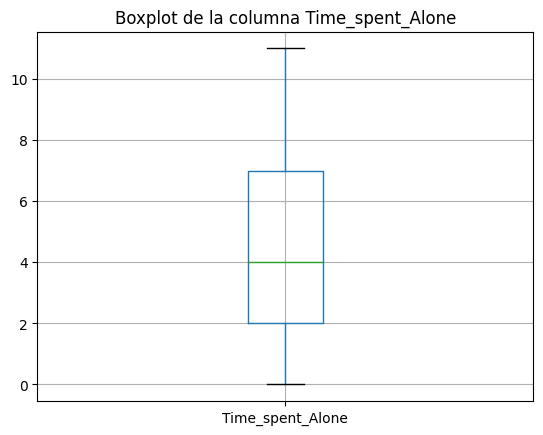

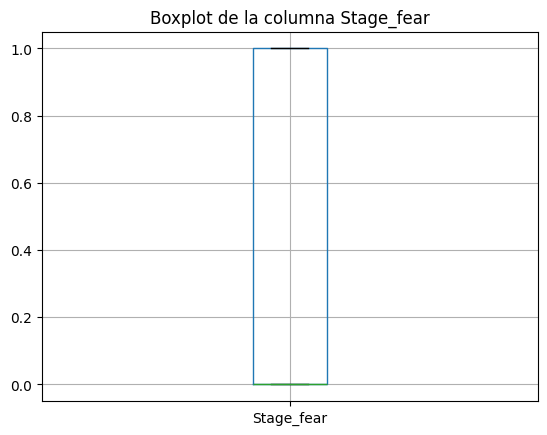

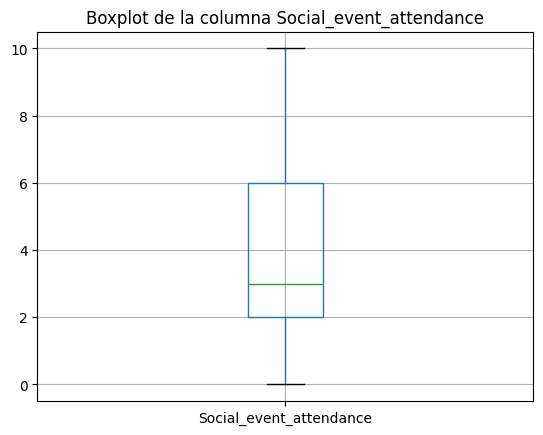

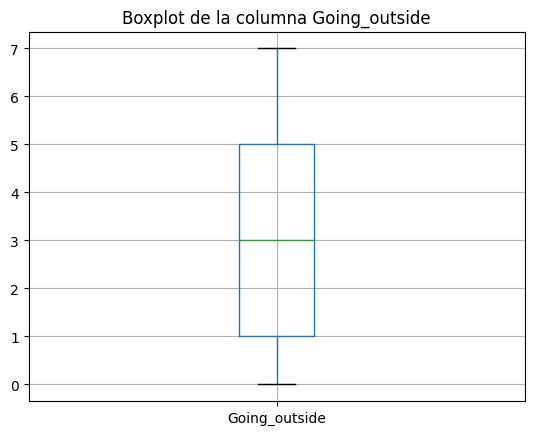

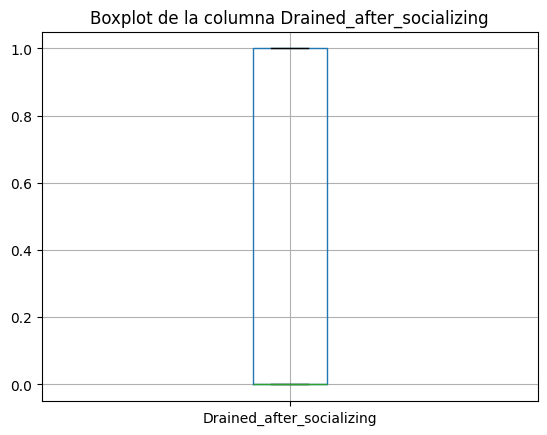

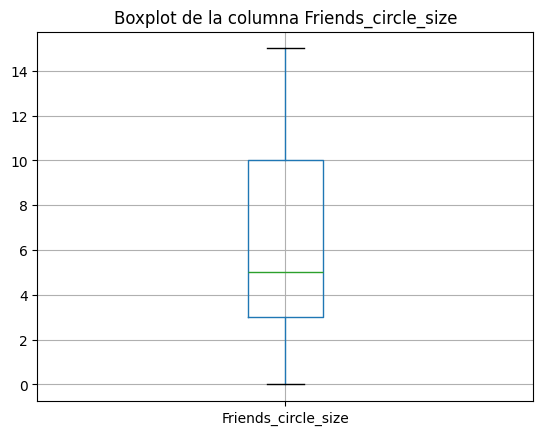

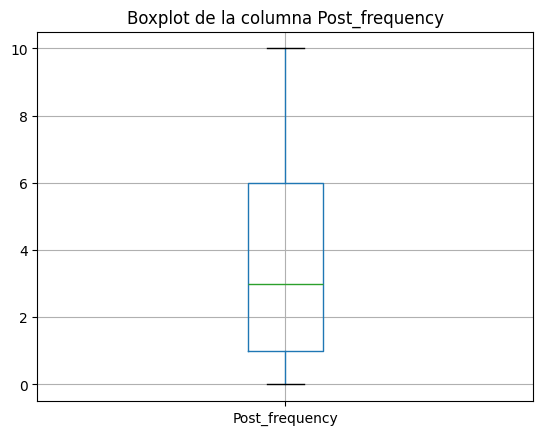

In [ ]:
# Vemos el boxplot de cada columna

for col in df.columns:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f"Boxplot de la columna {col}")
  plt.show()

In [ ]:
# No hay outliers, por lo que hay algunos modelos que funcionan de manera óptima en esta ocasión, elegimos varios modelos y vemos su funcionamiento
# se escalan los datos con Standard Scaler

X = df
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

# Separamos datos en entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(X_escalado,objetivo,random_state=2)

In [ ]:
# Separamos datos en entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(X_escalado,objetivo,random_state=2)

In [ ]:
# Modelos
svm = SVC()
l_regression = LogisticRegression(max_iter=1000)
forest = RandomForestClassifier()
kneigh = KNeighborsClassifier()

In [ ]:
# Entrenamiento de modelos y resultados
# SVM
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred_svm)

In [15]:
# Logistic Regression
l_regression.fit(x_train,y_train)
y_pred_regr = l_regression.predict(x_test)
acc_regr = accuracy_score(y_test,y_pred_regr)

In [16]:
# Random Forests
forest.fit(x_train,y_train)
y_pred_forest = forest.predict(x_test)
acc_forest = accuracy_score(y_test,y_pred_forest)

In [17]:
# KNeighbors
kneigh.fit(x_train,y_train)
y_pred_kneigh = kneigh.predict(x_test)
acc_neigh = accuracy_score(y_test,y_pred_kneigh)

In [ ]:
print(f"SMV: Accuracy = {acc_svm}")
print(f"Logistic Regression: Accuracy = {acc_regr}")
print(f"Random Forest: Accuracy = {acc_forest}")
print(f"KNeighbors Classifier: Accuracy = {acc_neigh}")

# Se ve que con todos los modelos se consigue un accuracy mayor al %93, esto quiere decir que todos están bien separados y se consiguen buenos resultados

SMV: Accuracy = 0.9438040345821326
Logistic Regression: Accuracy = 0.9438040345821326
Random Forest: Accuracy = 0.930835734870317
KNeighbors Classifier: Accuracy = 0.9322766570605188


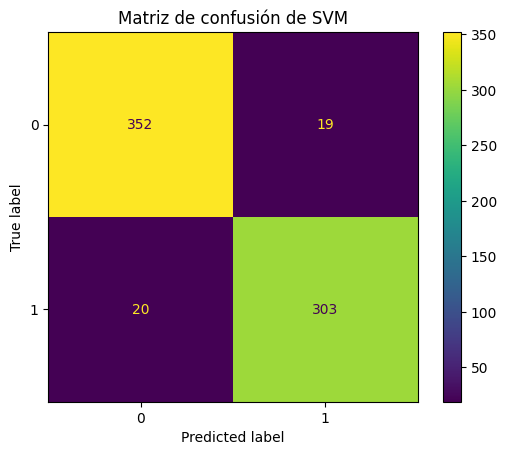

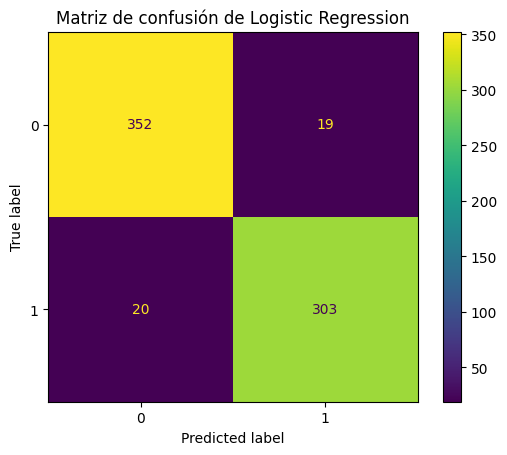

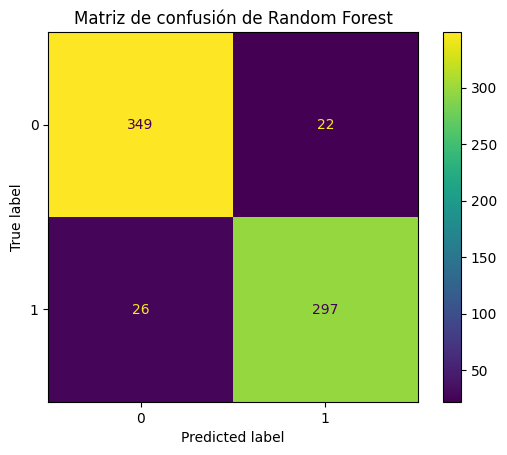

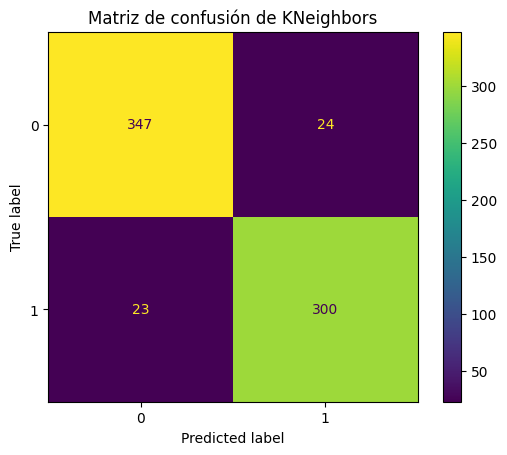

In [ ]:
# Graficamos las matrices de confusión de cada modelo

y_pred = {'SVM':y_pred_svm, 'Logistic Regression':y_pred_regr, 'Random Forest': y_pred_forest, 'KNeighbors': y_pred_kneigh}

for key, value in y_pred.items():
    cm = confusion_matrix(y_test,value)    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de confusión de {key}")
    plt.show()